<h1 align ="center"> REST API RAG Samples</h1>
<hr>
   
# Chat Completions

In [3]:
import json
import os
import base64
from IPython.display import Image, display
%run shared_functions.ipynb

### Setup Parameters


Here we will load the configurations from _config.json_ file to setup vision_api_key, vision_api_endpoint, search_service_endpoint, search_index_name, and search_query_key

In [7]:
# Load config values
with open(r'config.json') as config_file:
    config_details = json.load(config_file)

# Setting up the vision resource key
vision_api_key = os.getenv("VISION_API_KEY")

# The base URL for your vision resource endpoint, e.g. "https://<your-resource-name>.cognitiveservices.azure.com"
vision_api_endpoint = config_details['VISION_API_ENDPOINT']

# Setting up the Azure Search service endpoint.e.g. https://<your search service name>.search.windows.net  
search_service_endpoint = config_details['AZURE_SEARCH_SERVICE_ENDPOINT']

# Setting up the Azure Search service index
search_index_name = config_details['AZURE_SEARCH_INDEX_NAME']

# Setting up the Azure Search service query key
search_query_key = os.getenv("AZURE_SEARCH_QUERY_KEY")

### Create Azure Search Index

In [8]:
# Using the Azure Search service create the index with image embeddings
#https://github.com/Azure/azure-search-vector-samples/blob/main/demo-python/code/azure-search-vector-image-index-creation-python-sample.ipynb

### Call GPT-4V API with Image

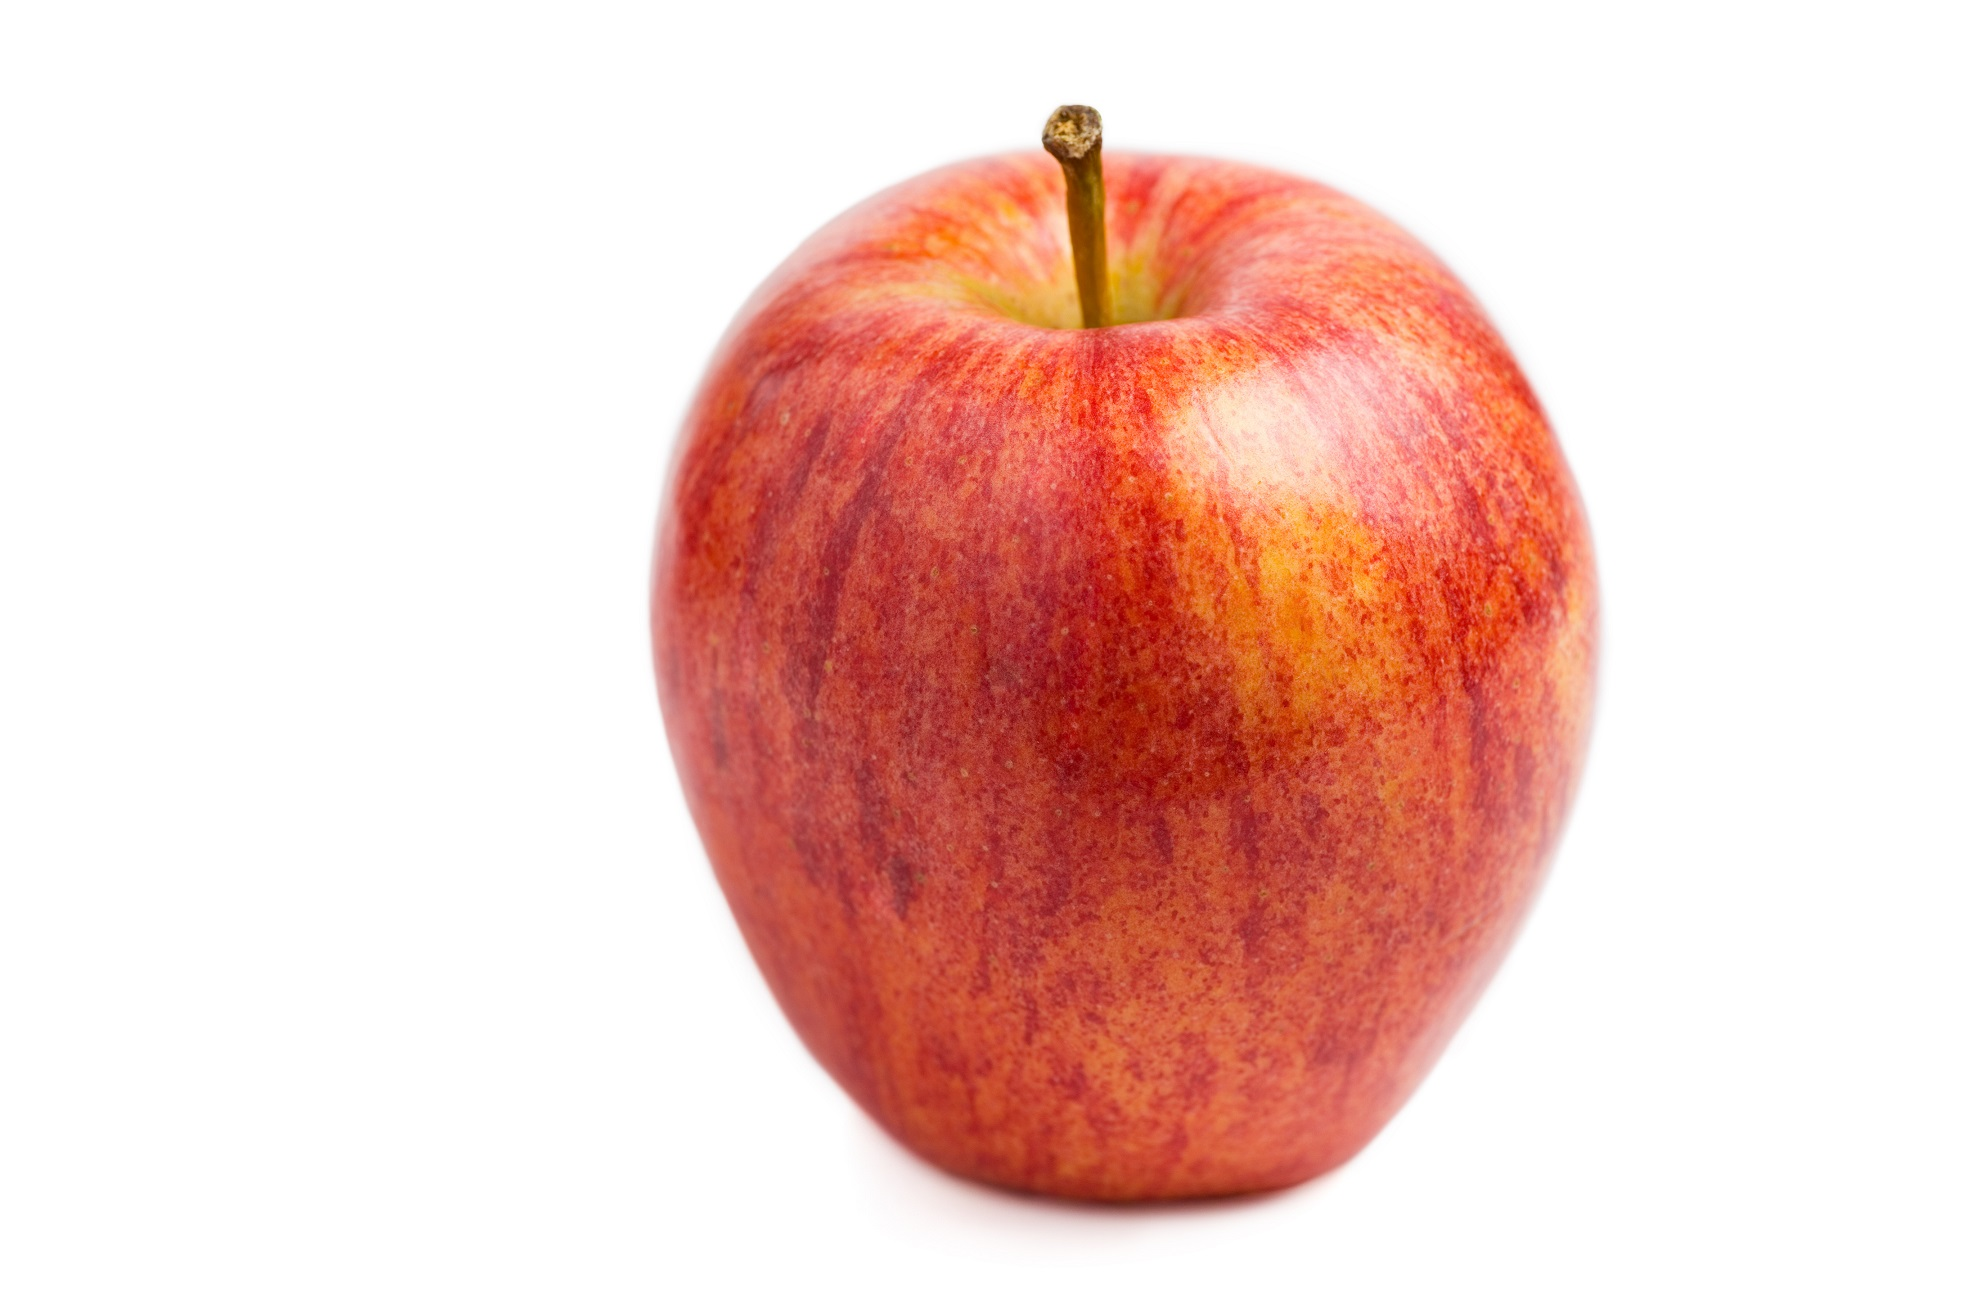

The apple shown in the image is a Gala apple.


In [9]:
# System messages and user prompt
sys_message = "You are an AI assistant that helps people find information."
user_prompt = "What are the types of the apple(s) shown in this image?"

# Encode the image in base64
image_file_path = "../../common/images/test_Gala.jpeg"  # Another example including two apples: "../../common/images/two_apples.jpeg".
with open(image_file_path, 'rb') as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
  
messages = [
    {
      "role": "system",
      "content": [
          {
            "type": "text", 
            "text": sys_message
          }
      ]
    },
    {
      "role": "user",
      "content": [
          {
            "type": "text",
            "text": user_prompt # Prompt for the user
          },
          {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{encoded_image}" # Image to be processed
          }
          }
      ]
    }
  ]

in_context_config = {
    'endpoint': search_service_endpoint,
    'key': search_query_key,
    'indexName': search_index_name
}

vision_api_config = {
    "endpoint": vision_api_endpoint,
    "key": vision_api_key
}

try:
    response_content = call_GPT4V_image(messages, in_context=in_context_config, vision_api=vision_api_config)
    display(Image(image_file_path))
    print(response_content['choices'][0]['message']['content'])  # Print the content of the response
except Exception as e:
    raise SystemExit(f"Failed to call GPT-4V API. Error: {e}")